In [281]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [282]:
# Load Csv
df = pd.read_csv('Social_Network_Ads.csv')
# Data Preprocessing
df.drop('User ID', axis = 1, inplace=True)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [283]:
# Separate Data
features = df.drop('Purchased', axis = 1)
label = df['Purchased']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features.values, label.values, test_size=0.25, random_state=42)

# Standardization
from sklearn.preprocessing import StandardScaler
training_scaler = StandardScaler()
testing_scaler = StandardScaler()

X_train = training_scaler.fit_transform(X_train)
X_test = testing_scaler.fit_transform(X_test)

# Cast Labels for ANNs 
y_train = tf.cast(y_train, dtype=tf.float64)
y_test = tf.cast(y_test, dtype=tf.float64)

print(X_test.shape, y_test.shape)
print(X_test.dtype, y_test.dtype)

(100, 3) (100,)
float64 <dtype: 'float64'>


In [284]:
from keras import Sequential
from keras.layers import InputLayer, Dense
from keras.metrics import MeanSquaredError, BinaryAccuracy
from keras.losses import MeanAbsoluteError
from keras.optimizers import Adam

ANN = Sequential([
  InputLayer(shape = (3,)),
  Dense(units = 30, activation = 'relu'),
  Dense(units = 20, activation = 'relu'),
  Dense(units = 10, activation = 'relu'),
  Dense(units = 1, activation='sigmoid')
])

ANN.compile(optimizer = Adam(), loss = MeanAbsoluteError(), metrics = [BinaryAccuracy(), MeanSquaredError()])

training = ANN.fit(X_train, y_train, epochs = 150)

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.6885 - loss: 0.4947 - mean_squared_error: 0.2449
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6914 - loss: 0.4865 - mean_squared_error: 0.2373 
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - binary_accuracy: 0.7458 - loss: 0.4732 - mean_squared_error: 0.2253  
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7478 - loss: 0.4546 - mean_squared_error: 0.2102 
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7269 - loss: 0.4385 - mean_squared_error: 0.1998 
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7859 - loss: 0.4070 - mean_squared_error: 0.1780 
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7700 - loss: 0.3776 - mean_squared_error: 0.1641 
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7569 - loss: 0.3480 - mean_squared_error: 0.1538 
Epoch 9/150
10/10 ━━━━━━━

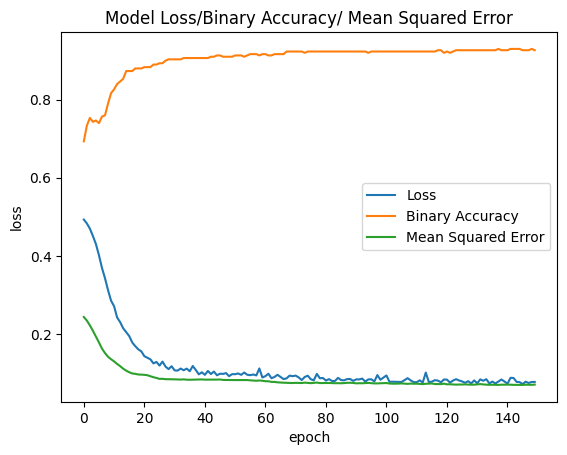

In [285]:
plt.plot(training.history['loss'])
plt.plot(training.history['binary_accuracy'])
plt.plot(training.history['mean_squared_error'])
plt.legend(['Loss', 'Binary Accuracy', 'Mean Squared Error'])
plt.title('Model Loss/Binary Accuracy/ Mean Squared Error')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [286]:
evaluation = ANN.evaluate(X_test, y_test)
evaluation

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.9387 - loss: 0.0655 - mean_squared_error: 0.0624  


[0.06133432313799858, 0.9300000071525574, 0.068880595266819]

In [287]:
## Testing on sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Logistic Regression
LR =LogisticRegression()
LR.fit(X_train, y_train)
LR_predictions = LR.predict(X_test)
LR_accuracy = accuracy_score(y_pred=LR_predictions, y_true=y_test)
print(f'Logistic Regression => Accuracy Score: {LR_accuracy:.2f}')

# Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_test)
tree_accuracy = accuracy_score(y_pred=tree_predictions, y_true=y_test)
print(f'Decision Tree => Accuracy Score: {tree_accuracy:.2f}')

# Random Forest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_predictions = forest.predict(X_test)
forest_accuracy = accuracy_score(y_pred=forest_predictions, y_true=y_test)
print(f'Random Forest => Accuracy Score: {forest_accuracy:.2f}')

# Support Vector RBF Kernel
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
svc_accuracy = accuracy_score(y_pred=svc_predictions, y_true=y_test)
print(f'svc_rbf => Accuracy: {svc_accuracy:.2f}')

Logistic Regression => Accuracy Score: 0.86
Decision Tree => Accuracy Score: 0.90
Random Forest => Accuracy Score: 0.93
svc_rbf => Accuracy: 0.93


<Axes: >

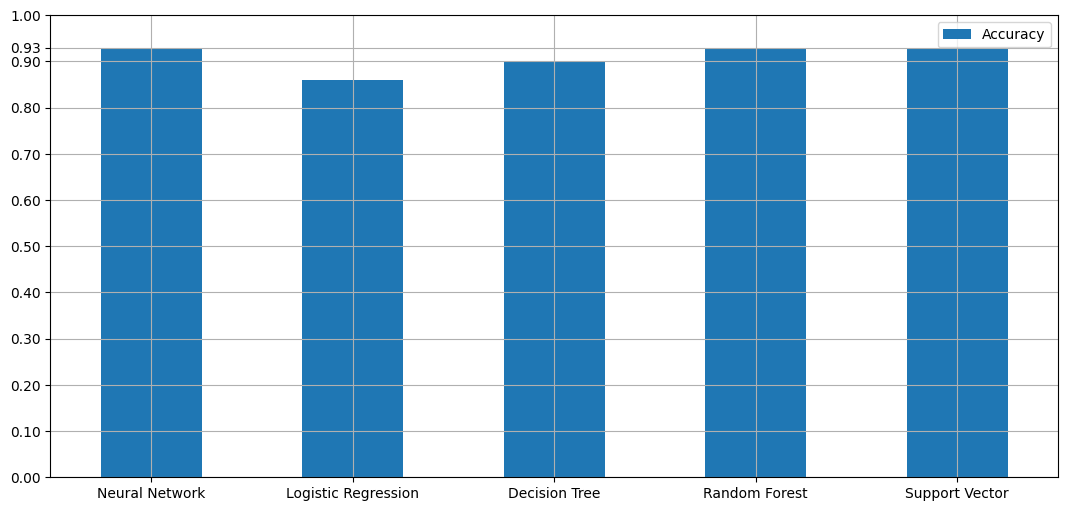

In [288]:
pd.DataFrame({
  'Accuracy': [evaluation[1], LR_accuracy, tree_accuracy, forest_accuracy, svc_accuracy]}, 
  index = ['Neural Network', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector']
  ).plot(kind='bar', grid=True, rot=0, figsize=(13,6), yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.93, 1])

<Axes: title={'center': 'Feature Importance'}>

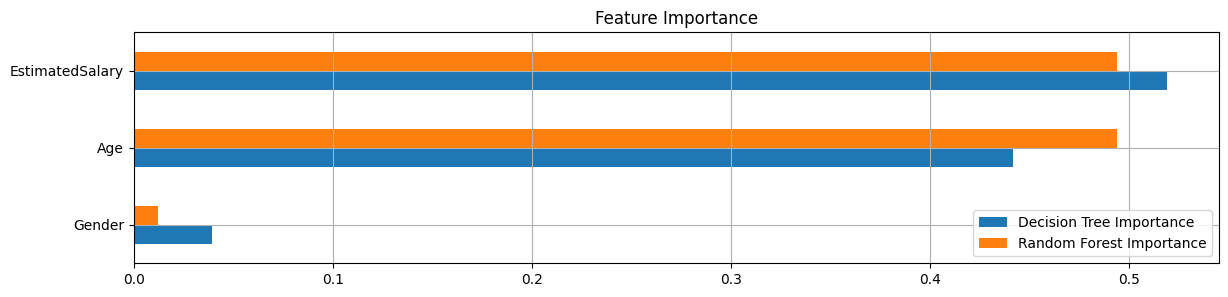

In [290]:
# Feature Importance
feature_importance = pd.DataFrame({
  'Decision Tree Importance': tree.feature_importances_, 
  'Random Forest Importance': forest.feature_importances_}, index=features.columns)
feature_importance.plot(kind='barh', rot=0, figsize=(14,3), title='Feature Importance', grid=True)